***AUTOMOBILE** **MILEAGE** **PREDICTION**

This dataset predict the mileage of a particular vehicle

The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes

The dataset consists of 398 entries and 9 columns.

**COLUMNS** **OF** **THE** **DATASET**

1.mpg: Miles per gallon (target variable).

2.cylinders: Number of cylinders in the car's engine.

3.displacement: Engine displacement in cubic inches.

4.horsepower: Engine horsepower (currently stored as an object type, likely due to some non-numeric values).

5.weight: Weight of the car.

6.acceleration: Time taken to accelerate from 0 to 60 mph.

7.model year: Year of the car model.

8.origin: Origin of the car (coded as integers).

9.car name: Name of the car (categorical, not needed for model building).

**DATA** **ANALYSATION**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DATA SCIENCE/PROJECT/ML PROJECT/auto-mpg.csv')

In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


In [ ]:
df.shape

(398, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [ ]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
df.isna().any()

,0
mpg,False
cylinders,False
displacement,False
horsepower,False
weight,False
acceleration,False
model year,False
origin,False
car name,False


In [ ]:
columns = df.columns
columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [ ]:
df.duplicated().any()

False

In [ ]:
for i in df.columns:
  print(df[i].unique(),i)
  print('*'*100)
  print(df[i].value_counts(),i)

[18.  15.  16.  17.  14.  24.  22.  21.  27.  26.  25.  10.  11.   9.
 28.  19.  12.  13.  23.  30.  31.  35.  20.  29.  32.  33.  17.5 15.5
 14.5 22.5 24.5 18.5 29.5 26.5 16.5 31.5 36.  25.5 33.5 20.5 30.5 21.5
 43.1 36.1 32.8 39.4 19.9 19.4 20.2 19.2 25.1 20.6 20.8 18.6 18.1 17.7
 27.5 27.2 30.9 21.1 23.2 23.8 23.9 20.3 21.6 16.2 19.8 22.3 17.6 18.2
 16.9 31.9 34.1 35.7 27.4 25.4 34.2 34.5 31.8 37.3 28.4 28.8 26.8 41.5
 38.1 32.1 37.2 26.4 24.3 19.1 34.3 29.8 31.3 37.  32.2 46.6 27.9 40.8
 44.3 43.4 36.4 44.6 40.9 33.8 32.7 23.7 23.6 32.4 26.6 25.8 23.5 39.1
 39.  35.1 32.3 37.7 34.7 34.4 29.9 33.7 32.9 31.6 28.1 30.7 24.2 22.4
 34.  38.  44. ] mpg
****************************************************************************************************
mpg
13.0    20
14.0    19
18.0    17
15.0    16
26.0    14
        ..
31.9     1
16.9     1
18.2     1
22.3     1
44.0     1
Name: count, Length: 129, dtype: int64 mpg
[8 4 6 3 5] cylinders
**************************************************

In [ ]:
print(df.isnull().sum())

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
dup = df.duplicated().sum()
dup

0

In [ ]:
percentage = df.isna().sum()/df.shape[0]*100
percentage

,0
mpg,0.0
cylinders,0.0
displacement,0.0
horsepower,0.0
weight,0.0
acceleration,0.0
model year,0.0
origin,0.0
car name,0.0


In [ ]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

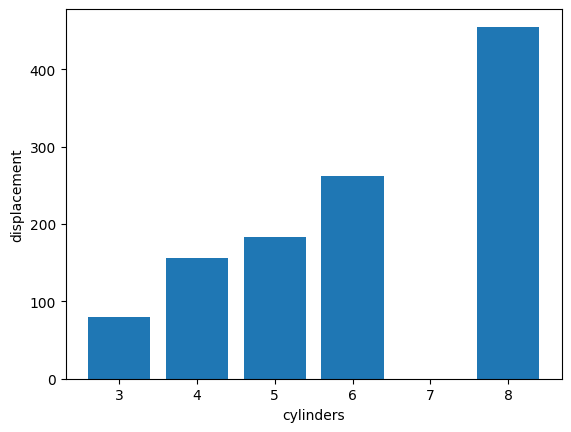

In [ ]:
cyl = df.cylinders
dis = df.displacement
horse = df.horsepower
weight = df.weight
acc = df.acceleration
origin = df.origin

plt.bar(cyl,dis)
plt.xlabel('cylinders')
plt.ylabel('displacement')
plt.show()

OUTLIER

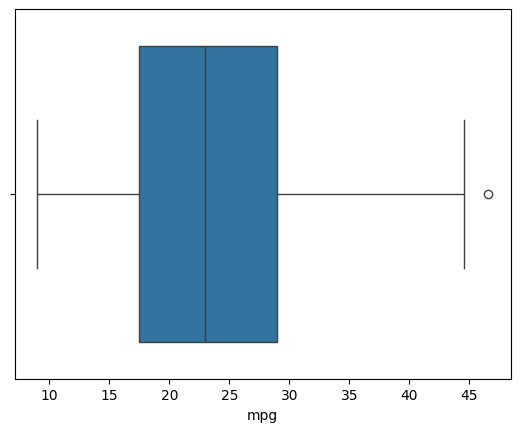

mpg ****************************************************************************************************


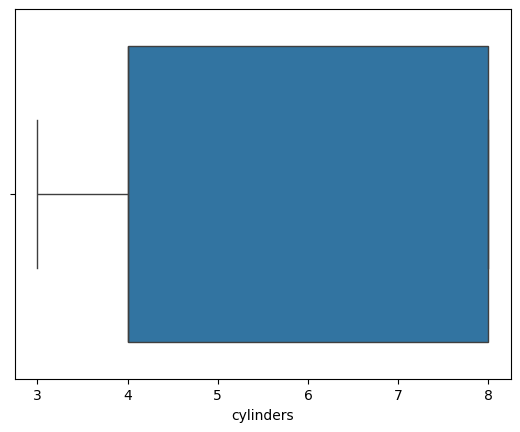

cylinders ****************************************************************************************************


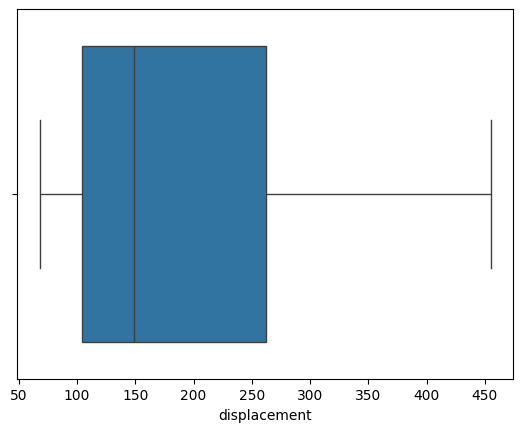

displacement ****************************************************************************************************


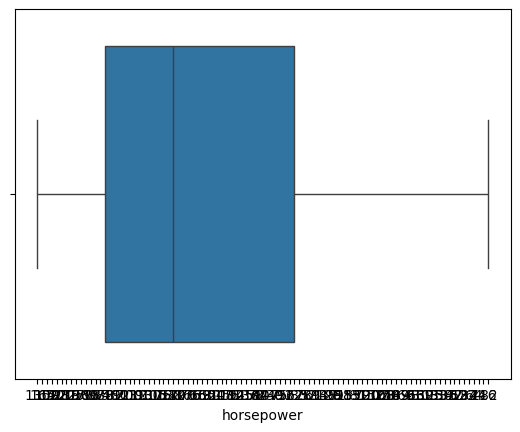

horsepower ****************************************************************************************************


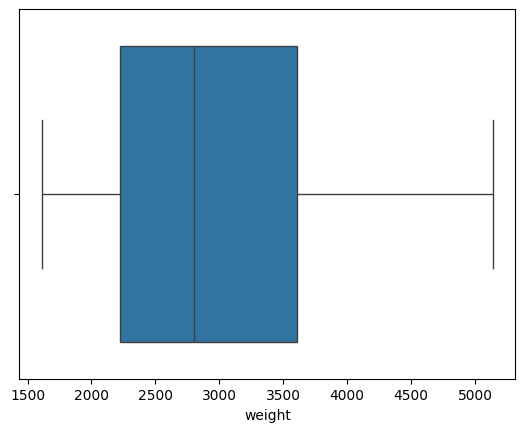

weight ****************************************************************************************************


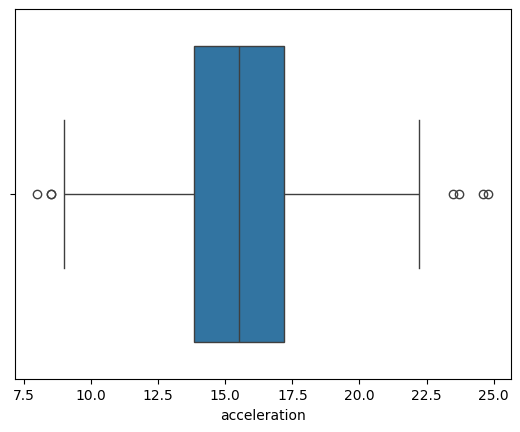

acceleration ****************************************************************************************************


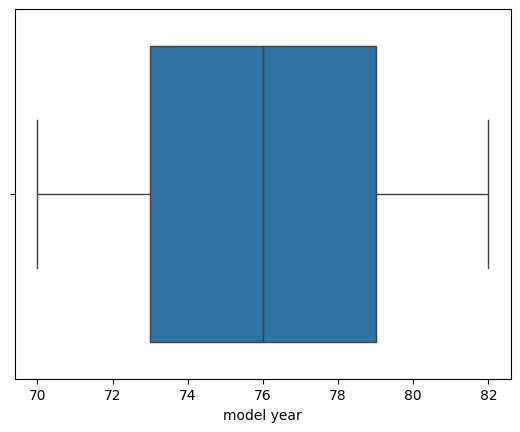

model year ****************************************************************************************************


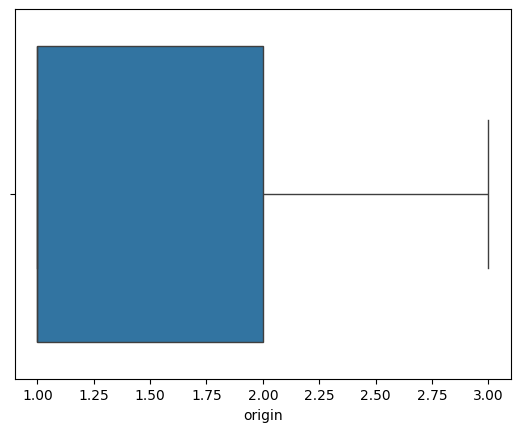

origin ****************************************************************************************************


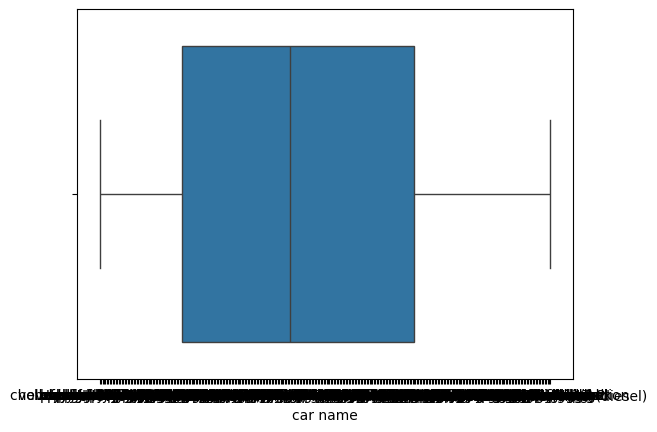

car name ****************************************************************************************************


In [ ]:
for i in df.columns:
  sns.boxplot(x=df[i])
  plt.show()
  print(i,'*'*100)


LABEL ENCODER

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

labelfit = le.fit(df['car name'])
df['car name'] = labelfit.transform(df['car name'])

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,49
1,15.0,8,350.0,165,3693,11.5,70,1,36
2,18.0,8,318.0,150,3436,11.0,70,1,231
3,16.0,8,304.0,150,3433,12.0,70,1,14
4,17.0,8,302.0,140,3449,10.5,70,1,161


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

labelfit = le.fit(df['horsepower'])
df['horsepower'] = labelfit.transform(df['horsepower'])

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,15,3504,12.0,70,1,49
1,15.0,8,350.0,33,3693,11.5,70,1,36
2,18.0,8,318.0,27,3436,11.0,70,1,231
3,16.0,8,304.0,27,3433,12.0,70,1,14
4,17.0,8,302.0,22,3449,10.5,70,1,161


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    int64  
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 28.1 KB


SPLITTING FOR TRAINING AND TESTING

In [ ]:
x = df.drop('mpg',axis=1)

y = df['mpg']

In [ ]:
x.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,8,307.0,15,3504,12.0,70,1,49
1,8,350.0,33,3693,11.5,70,1,36
2,8,318.0,27,3436,11.0,70,1,231
3,8,304.0,27,3433,12.0,70,1,14
4,8,302.0,22,3449,10.5,70,1,161


In [ ]:
y.head()

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
x_train

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
204,4,85.0,65,1990,17.0,76,3,91
186,4,101.0,77,2202,15.3,76,2,254
3,8,304.0,27,3433,12.0,70,1,14
390,4,144.0,90,2665,13.9,82,3,264
193,6,200.0,75,3012,17.6,76,1,150
...,...,...,...,...,...,...,...,...
299,4,141.0,66,3190,24.8,79,2,211
22,4,104.0,89,2375,17.5,70,2,258
72,8,304.0,27,3892,12.5,72,1,11
15,6,198.0,89,2833,15.5,70,1,220


In [ ]:
y_train.value_counts()

,count
mpg,
13.0,17
14.0,16
15.0,15
18.0,13
16.0,12
...,...
37.7,1
26.5,1
27.5,1


SO THIS IS A CONTINOUS DATA (REGRESSION)

**STANDARDIZATION**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

**MODEL** **BUILDING**

1.**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsRegressor()

In [ ]:
y_pred = knn.predict(x_test)

In [ ]:
print(y_pred)

[12.4  22.2  36.26 24.   34.16 12.2  13.4  15.5  14.5  18.94 25.52 25.4
 33.08 19.12 27.8  28.66 20.02 36.   33.84 14.2  36.   17.52 24.   29.46
 13.6  18.06 25.2  20.64 34.76 15.9  26.6  31.   20.8  29.1  14.6  35.54
 21.36 27.8  12.4  38.54 17.22 19.34 20.2  27.4  24.8  34.58 15.   15.8
 35.18 25.6  27.8  17.26 25.98 28.68 23.26 13.6  27.4  15.9  15.4  24.2
 33.98 25.88 34.24 18.56 16.32 32.96 20.6  24.86 13.6  39.64 18.1  30.08
 13.8  31.38 27.6  16.56 18.72 14.4  20.44 33.52]


EVALUATION

In [ ]:
trainingscore = knn.score(x_train,y_train)
testscore = knn.score(x_test,y_test)
print('Training Score = ',trainingscore)
print('Testing Score = ',testscore)


Training Score =  0.8961408600417858
Testing Score =  0.8528301733422747


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 9.052600000000004
R-squared: 0.8528301733422747


2.**DECISION** **TREE**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
y_pred4 = dt.predict(x_test)


In [ ]:
y_pred4

array([13. , 30. , 34.4, 21. , 35. , 12. , 12. , 13. , 14. , 18.5, 30. ,
       23. , 33. , 15. , 31. , 25. , 22. , 31.3, 39. , 16. , 34. , 17.6,
       28. , 31. , 14. , 17.6, 24. , 20.2, 41.5, 17.5, 26. , 32.4, 19. ,
       29. , 15. , 31.5, 26.8, 36. , 12. , 46.6, 19. , 19. , 20.2, 26. ,
       26. , 32.8, 13. , 16. , 32. , 21.1, 24. , 38. , 25. , 28.4, 22. ,
       13. , 24. , 17.5, 13. , 23. , 32. , 31. , 31.5, 18.2, 15. , 39.1,
       21. , 28.8, 14. , 32.8, 18.5, 33. , 14. , 26.5, 25. , 18.5, 18.5,
       14. , 19.4, 29.9])

**EVALUATION**

In [ ]:
trainingscore = dt.score(x_train,y_train)
testscore = dt.score(x_test,y_test)
print('Training Score = ',trainingscore)
print('Testing Score = ',testscore)


Training Score =  1.0
Testing Score =  0.7995285415269564


In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 9.052600000000004
R^2 Score: 0.8528301733422747


In [ ]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

PLOTTING DECISION TREE

[Text(0.5299840856481481, 0.9705882352941176, 'mpg <= 0.043\nsquared_error = 60.684\nsamples = 318\nvalue = 23.367'),
 Text(0.2601727363264427, 0.9117647058823529, 'horsepower <= -0.908\nsquared_error = 35.316\nsamples = 169\nvalue = 28.879'),
 Text(0.11863089470284238, 0.8529411764705882, 'acceleration <= 0.393\nsquared_error = 26.2\nsamples = 75\nvalue = 32.725'),
 Text(0.05770887166236004, 0.7941176470588235, 'horsepower <= -1.05\nsquared_error = 11.478\nsamples = 35\nvalue = 28.914'),
 Text(0.02756244616709733, 0.7352941176470589, 'horsepower <= -1.375\nsquared_error = 6.67\nsamples = 22\nvalue = 30.477'),
 Text(0.013781223083548665, 0.6764705882352942, 'weight <= 0.789\nsquared_error = 3.688\nsamples = 4\nvalue = 33.75'),
 Text(0.0068906115417743325, 0.6176470588235294, 'acceleration <= -0.279\nsquared_error = 1.0\nsamples = 2\nvalue = 32.0'),
 Text(0.0034453057708871662, 0.5588235294117647, 'squared_error = 0.0\nsamples = 1\nvalue = 31.0'),
 Text(0.0103359173126615, 0.55882352941

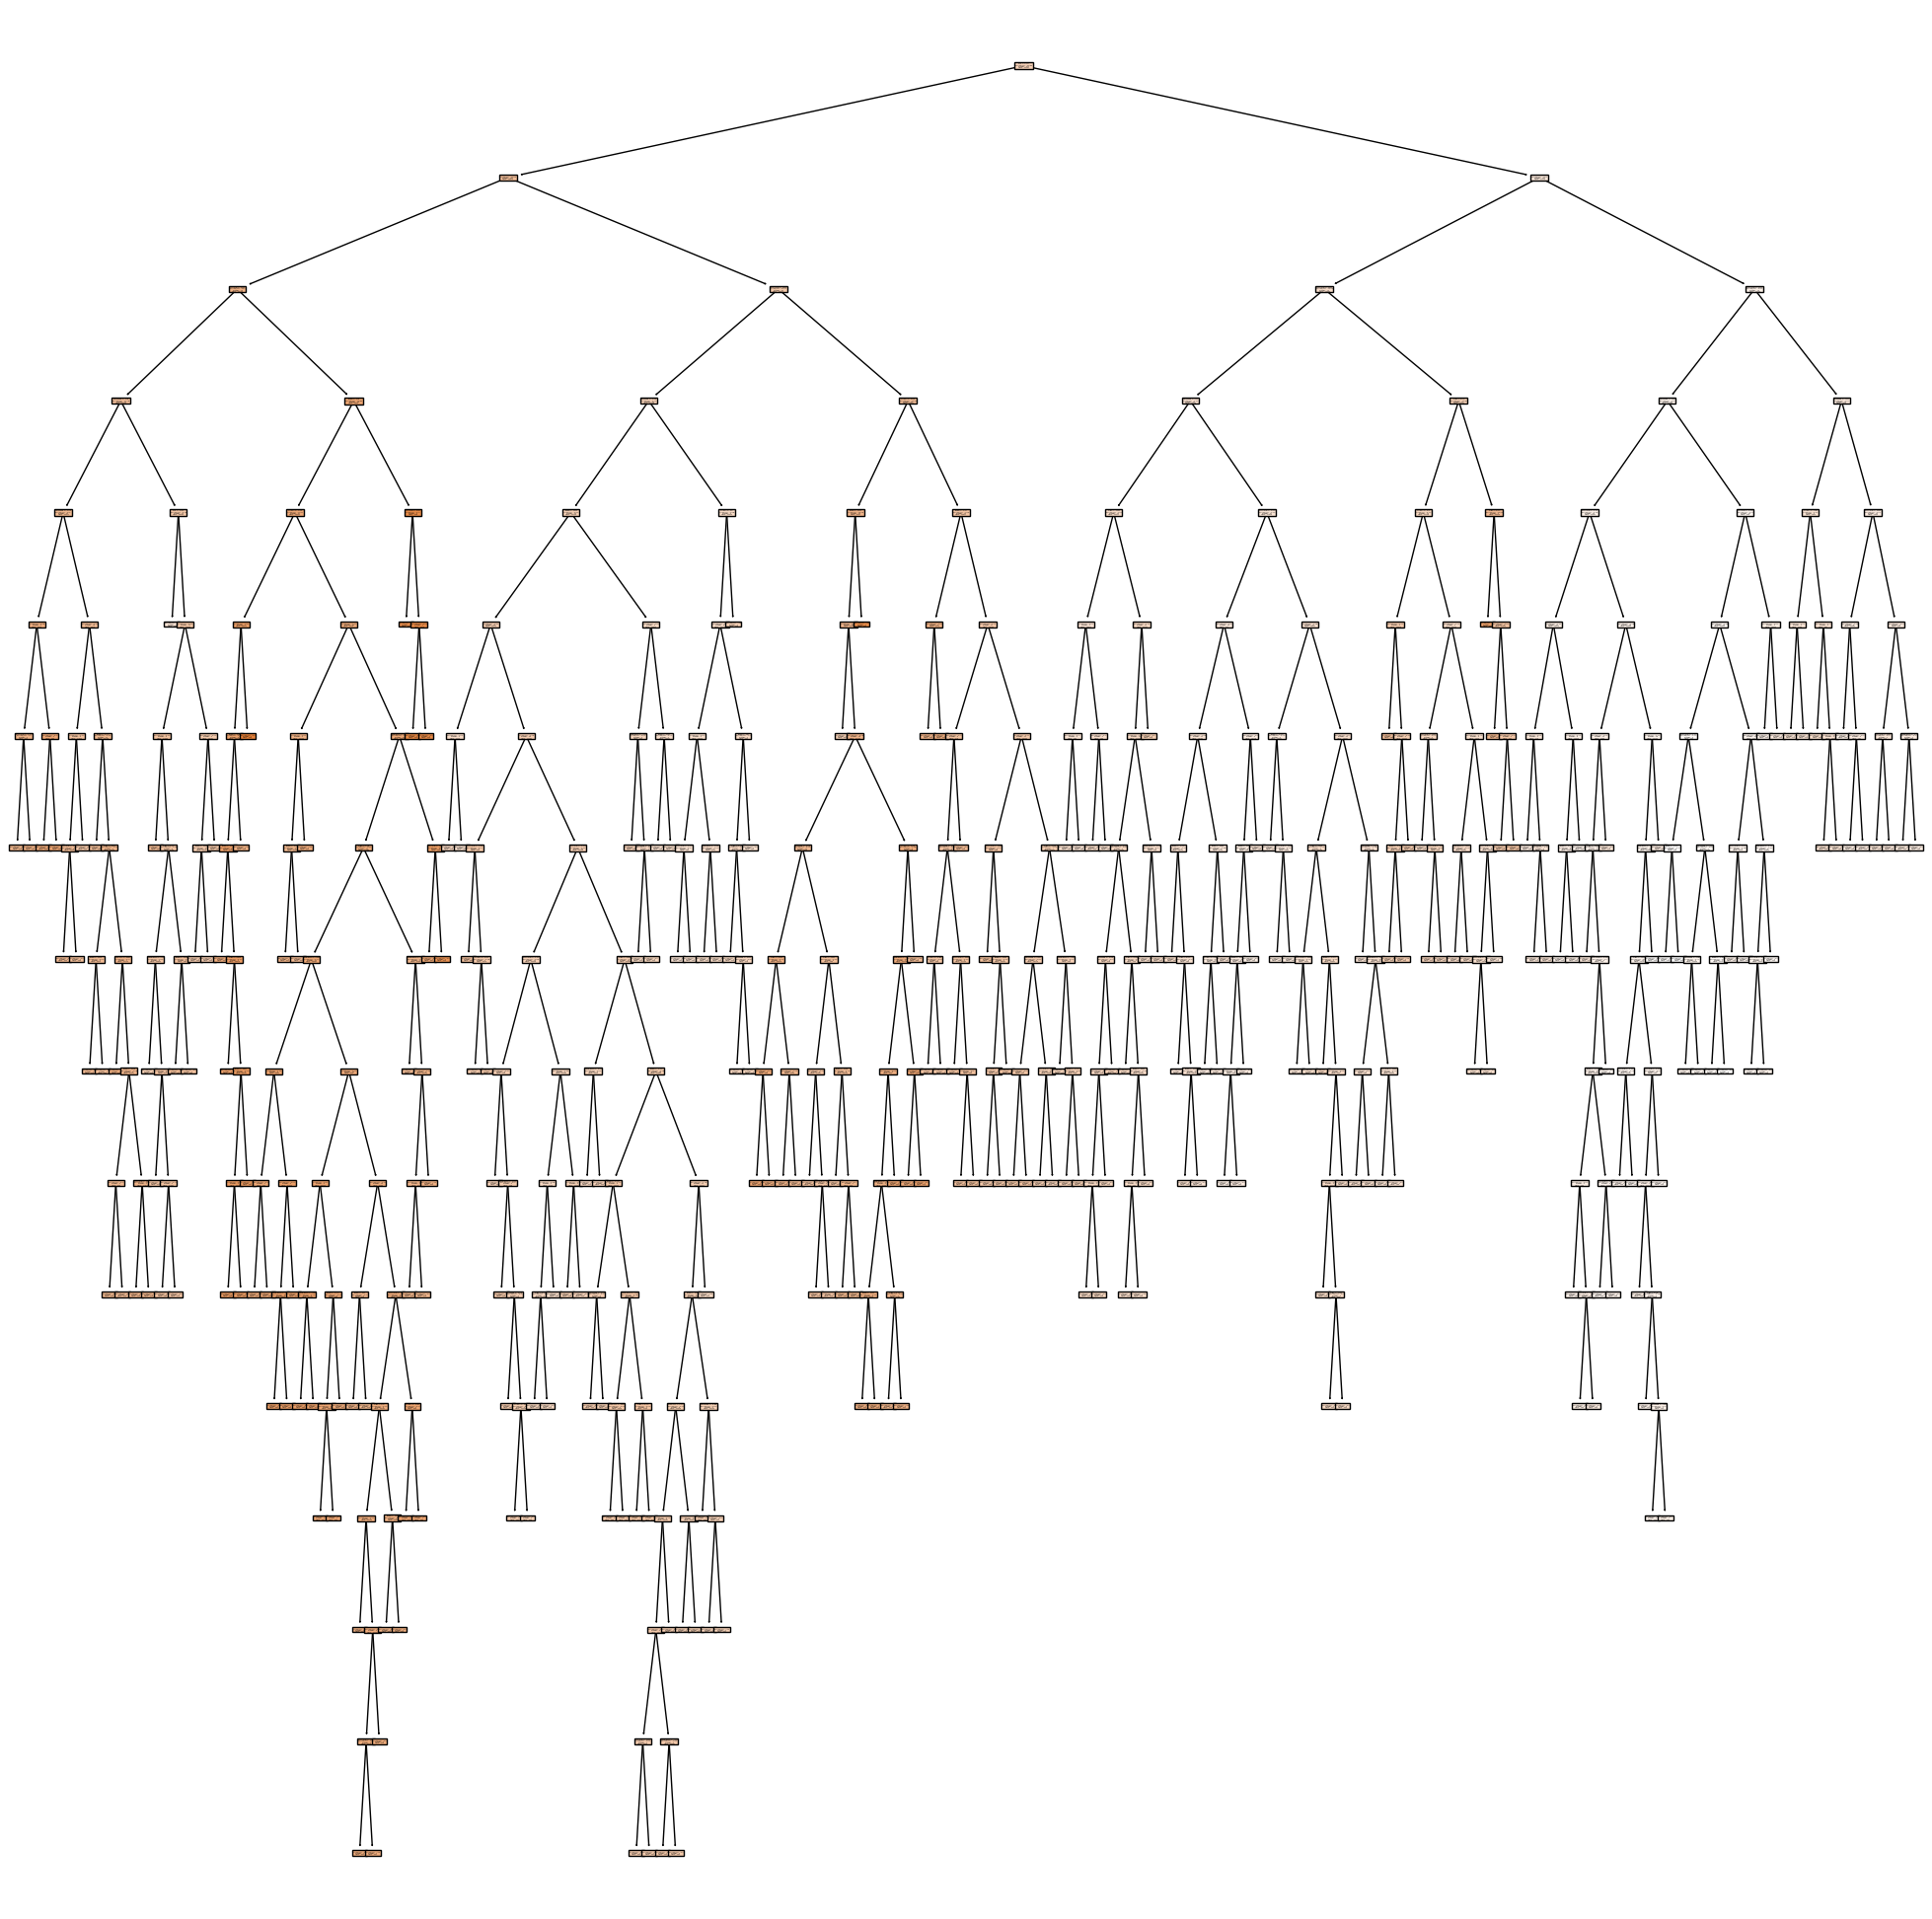

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(25,25))
tree.plot_tree(dt)
tree.plot_tree(dt,feature_names=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],class_names=['0','1'],filled=True)

3.**SVM** SUPPORT VECTOR MACHINE ALGORITHM

In [ ]:
from sklearn.svm import SVR
svm = SVR(kernel='rbf')
svm.fit(x_train, y_train)

SVR()

In [ ]:
y_pred2 = svm.predict(x_test)
y_pred2

array([13.55528597, 23.56301119, 32.40545695, 24.47045785, 31.49522519,
       13.0759103 , 13.6932254 , 14.66709841, 14.17092572, 18.44605305,
       23.70364833, 24.11653235, 31.06251447, 18.2398825 , 28.01168642,
       28.36351292, 18.6307678 , 31.94542996, 34.57333944, 16.18932978,
       33.02669817, 18.04395198, 25.67541231, 29.58558545, 12.71426   ,
       18.22128327, 22.88249811, 20.90561273, 32.08664276, 17.64650788,
       25.97206412, 31.52176265, 19.91785353, 29.38974363, 15.78561407,
       31.99190003, 21.0912784 , 26.83555607, 15.60370451, 32.61952747,
       17.68989626, 19.03538032, 18.02833905, 26.52012413, 27.28680563,
       32.50968398, 16.56567079, 14.72230812, 32.61182621, 25.67944471,
       27.34770502, 20.63388557, 26.6667156 , 26.79034212, 24.31589175,
       13.30805287, 28.88962126, 18.72732634, 14.35936412, 23.19342651,
       29.83550133, 29.63062396, 33.53241852, 20.11849512, 17.66343659,
       32.38175225, 20.11598209, 23.46398874, 13.36201319, 32.88

EVALUATION

In [ ]:
trainingscore = svm.score(x_train,y_train)
testscore = svm.score(x_test,y_test)
print('Training Score = ',trainingscore)
print('Testing Score = ',testscore)


Training Score =  0.839359120801862
Testing Score =  0.8436457863857627


In [ ]:
mse = mean_squared_error(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 9.617543122178757
R^2 Score: 0.8436457863857627


4.**LINEAR** **REGRESSION**

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred3 = regressor.predict(x)
y_pred3

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([-19692.61017025, -20726.89387234, -19187.73259588, -19296.29504262,
       -19324.55494081, -24328.10778422, -24404.39423985, -24101.36919204,
       -24726.56737365, -21594.9879075 , -19884.50380512, -20168.91901426,
       -21035.9886578 , -17017.23679096, -13265.61268406, -15846.19473973,
       -15601.43920982, -14444.53072813, -11967.87998409, -10166.39907745,
       -15052.77632039, -13739.77155   , -13304.94426709, -12595.7857641 ,
       -14869.35182287, -26037.95923491, -24760.5479119 , -24756.8087434 ,
       -26795.56149356, -11965.03174201, -12692.5657529 , -12424.6570514 ,
       -11440.42675133, -14759.04167131, -19356.05136267, -18762.97822537,
       -18525.64390714, -18571.38900605, -23725.07155814, -25041.45374824,
       -23361.57218238, -23037.7111985 , -27992.84398051, -26740.65200044,
       -28980.56406218, -16627.53939003, -13536.87267601, -18396.03518307,
       -17580.54316943, -12408.17603065, -11839.90593419, -11616.13314312,
       -11591.42013412,  

In [ ]:
trainingscore = regressor.score(x_train,y_train)
testscore = regressor.score(x_test,y_test)
print('Training Score = ',trainingscore)
print('Testing Score = ',testscore)


Training Score =  0.8071337882591054
Testing Score =  0.8820106479543097


In [ ]:

y_pred3 = regressor.predict(x_test)


mse = mean_squared_error(y_test, y_pred3)
r2 = r2_score(y_test, y_pred3)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 7.257672531020466
R^2 Score: 0.8820106479543097


6.**RANDOM** **FOREST**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=20,criterion='squared_error',max_depth=5,max_features=5)
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=5, max_features=5, n_estimators=20)

In [ ]:
y_pred5 = rf.predict(x_test)

print(y_pred5)

[12.70812759 27.43780132 33.42335385 22.35834934 31.53725403 12.75572226
 12.97609771 14.44229441 14.27838718 18.26568959 24.85387031 22.95169592
 30.69732543 19.04400525 30.244117   24.25986064 18.59711242 29.46086639
 36.92578165 14.73865326 33.16575199 17.44267026 27.7279918  28.91974245
 13.25929    17.65592207 23.33057781 20.72208193 33.24078307 17.43312066
 29.0914921  33.16575199 20.51733999 28.60075755 13.89237198 31.93770151
 20.15289848 30.88708152 12.62844344 37.23647522 18.11058051 19.3121791
 21.94327295 24.68815851 25.31992561 37.27336731 14.49281246 14.27791271
 34.45322    23.9842167  28.69944806 18.78906201 23.80005967 27.26222816
 23.34360441 13.45722577 28.98568989 16.88357601 14.36319154 24.15699312
 30.64133922 29.230309   34.79385439 17.62038819 18.36901483 33.15601974
 21.17124634 25.45969767 13.46096999 37.40128292 16.35319337 28.66924063
 14.17326472 27.97093026 24.84173484 16.91002331 17.4412172  14.04004
 18.66029971 30.74952144]


In [ ]:
trainingscore = rf.score(x_train,y_train)
testscore = rf.score(x_test,y_test)
print('Training Score = ',trainingscore)
print('Testing Score = ',testscore)


Training Score =  0.9400351160978737
Testing Score =  0.859830283475469


In [ ]:
mse = mean_squared_error(y_test, y_pred5)
r2 = r2_score(y_test, y_pred5)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 8.622014475569557
R^2 Score: 0.859830283475469


7.**RANDOM** **SEARCH** **CV**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint


In [ ]:
rfc = RandomForestRegressor(n_estimators=20)
rfc.fit(x_train,y_train)

RandomForestRegressor(n_estimators=20)

In [ ]:
y_pred =rfc.predict(x_test)

In [ ]:
param_dist ={"max_depth":[3,4,5,6,78,None],
             "max_features":sp_randint(1,11),
             "min_samples_split":sp_randint(2,11),
             "criterion":['squared_error','absolute_error']}

In [ ]:
rfc1 = RandomForestRegressor(n_estimators=20)


In [ ]:
randomCV = RandomizedSearchCV(rfc1,param_distributions=param_dist,cv=10)

In [ ]:
randomCV.fit(x_train,y_train)
print(randomCV.best_params_)

{'criterion': 'absolute_error', 'max_depth': 78, 'max_features': 3, 'min_samples_split': 6}


In [ ]:
print(randomCV.score(x_test,y_test))

0.8662568915239083


In [ ]:
rfc2 = RandomForestRegressor(n_estimators=50,criterion='absolute_error',max_depth=78,max_features=3,min_samples_split=6)

In [ ]:
rfc2.fit(x_train,y_train)
y_pred = rfc2.predict(x_test)


In [ ]:
training_score = rfc2.score(x_train,y_train)
training_score

0.9587951951882022

In [ ]:
trainingscore = rfc2.score(x_train,y_train)
testscore = rfc2.score(x_test,y_test)
print('Training Score = ',trainingscore)
print('Testing Score = ',testscore)


Training Score =  0.9587951951882022
Testing Score =  0.8509646670324535


In [ ]:
mse = mean_squared_error(y_test, y_pred5)
r2 = r2_score(y_test, y_pred5)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 8.622014475569557
R^2 Score: 0.859830283475469


Acoording to these models, Ensemble model provides the best training and testing score rather than than other model.